# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data is collected from a Protuguese bank's directed marketing campaigns. Bank's own contact-center ran a total of 17 campaigns between May 2008 and November 2010. 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,  ConfusionMatrixDisplay, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay, classification_report
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC

from sklearn.dummy import DummyClassifier
import time

In [ ]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [102]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There is no missing values in this dataset. It contains 10 object column which will be transformed to number format later in the course.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Objective of this task is to compare performance of models created using classifiers Logistic Regression, Decision Tree, K Nearest Neighbor and Support Vector Machines. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

##### Target distribution in data set :

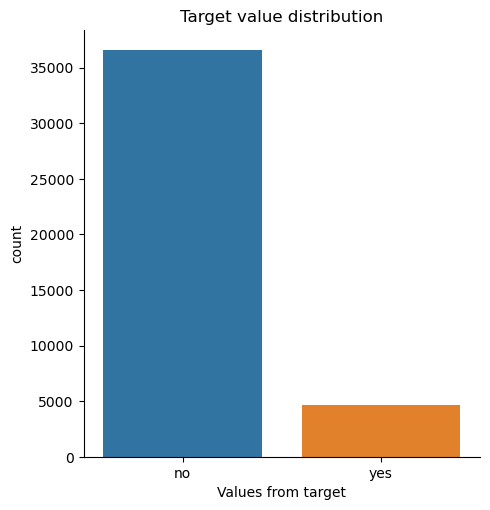

In [122]:
sns.catplot(x="y", kind="count", data = df);
plt.title ('Target value distribution')
plt.xlabel("Values from target")

plt.show ()

In [ ]:
Classes in this datasets are found as highly imbalanced. SVM is considered as one of the models that can handle imbalanced classes when using right kernal and reularization. Logistic Regression is another model that will can handle imbalanced classes.

Text(0.5, 1.0, 'Count by Age on the Bank Marketing Campaign')

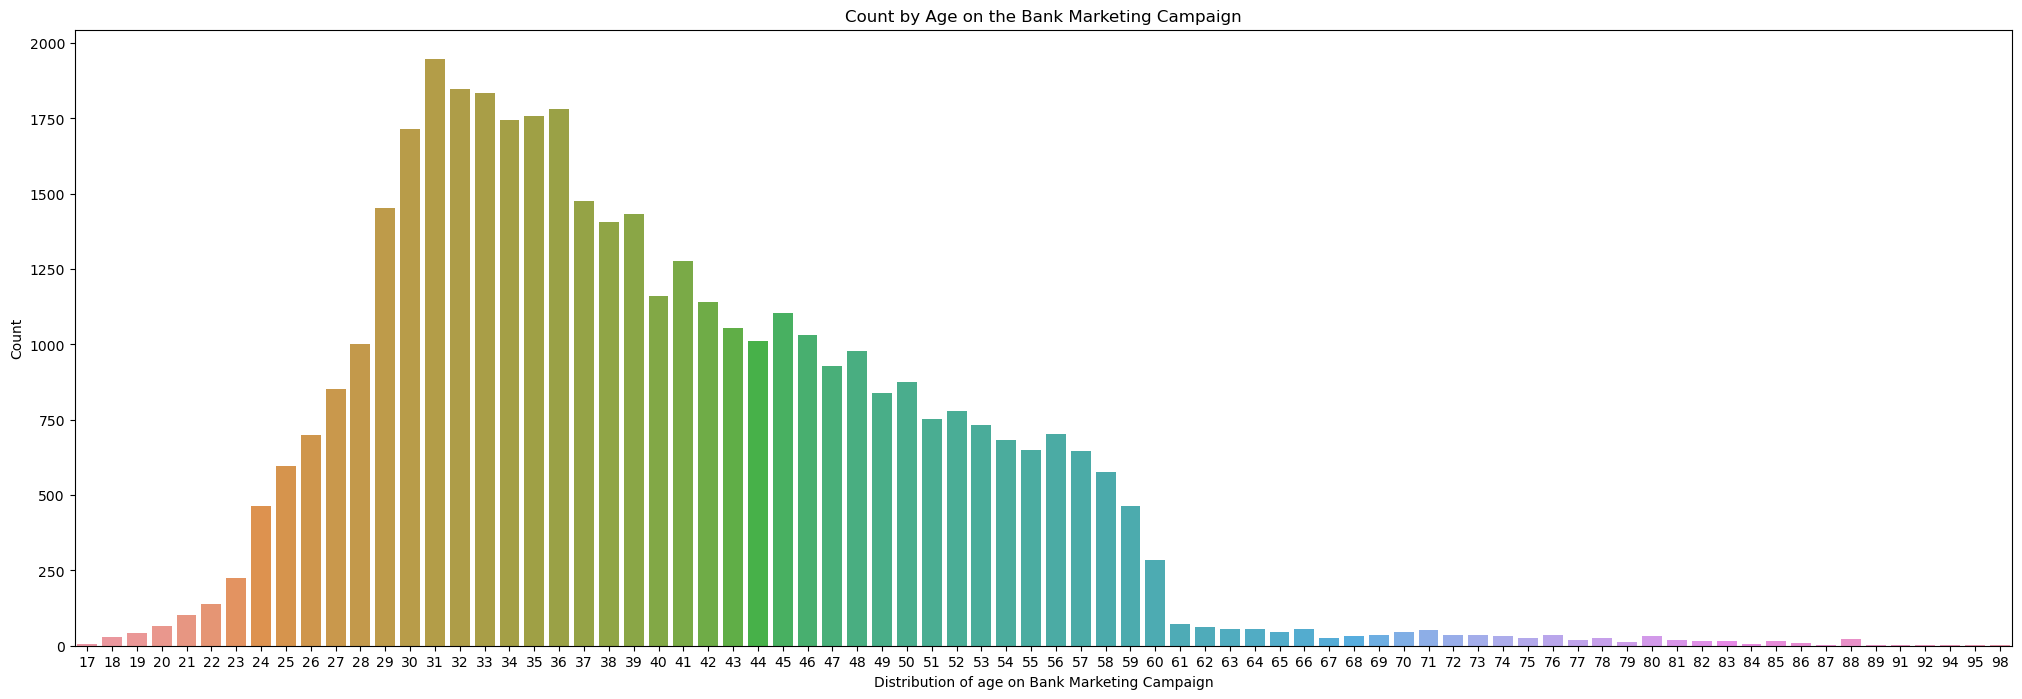

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
fig = sns.countplot(x="age", data=df)
plt.xlabel("Distribution of age on Bank Marketing Campaign")
plt.ylabel("Count")
plt.title("Count by Age on the Bank Marketing Campaign")

In [ ]:
Majority of the customers in the analysis is aged between 28 and 46 years.

Text(0.5, 1.0, 'Count by Jobs on the Bank Marketing Campaign')

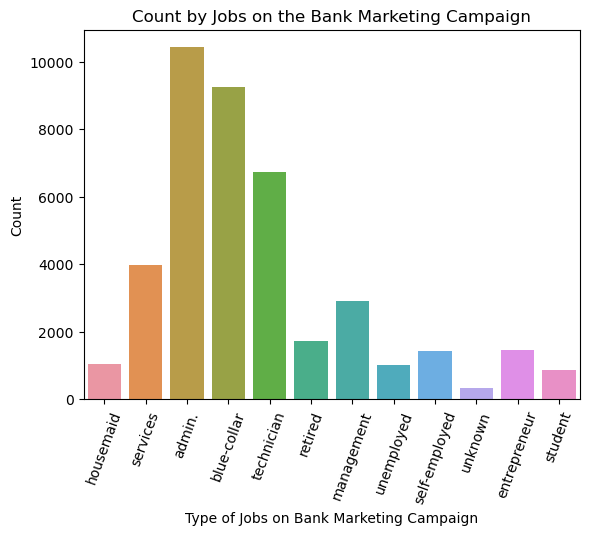

In [117]:
fig = sns.countplot(x="job", data=df)
plt.xlabel("Type of Jobs on Bank Marketing Campaign")
plt.xticks(rotation=70)
plt.ylabel("Count")
plt.title("Count by Jobs on the Bank Marketing Campaign")

In [ ]:
Admin , Blue-collar , technicial and services are the main categories of Job in this campaign.

##### Preprocessing the data using Label Encoder

In [125]:
le = preprocessing.LabelEncoder()

In [126]:
df['job'] = le.fit_transform(df['job'].astype('str'))
df['marital'] = le.fit_transform(df['marital'].astype('str'))
df['education'] = le.fit_transform(df['education'].astype('str'))
df['default'] = le.fit_transform(df['default'].astype('str'))
df['housing'] = le.fit_transform(df['housing'].astype('str'))
df['loan'] = le.fit_transform(df['loan'].astype('str'))
df['contact'] = le.fit_transform(df['contact'].astype('str'))
df['month'] = le.fit_transform(df['month'].astype('str'))
df['day_of_week'] = le.fit_transform(df['day_of_week'].astype('str'))
df['poutcome'] = le.fit_transform(df['poutcome'].astype('str'))
df['y'] = le.fit_transform(df['y'].astype('str'))

In [129]:
X = df.drop(['y'], axis = 1)
y = df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42,
                                                   stratify = y)

Train and Test data are scaled using Standard scaler. This scaled data is used in Logistic Regression, KNN and SVM models.

In [134]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [137]:
dummy_clf = DummyClassifier(strategy='most_frequent')

In [138]:
dummy_pipe = Pipeline([('transform', transformer), ('Dummy', DummyClassifier(strategy='most_frequent'))])

In [139]:
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing', 'loan',
                                                   'contact', 'poutcome', 'job',
                                                   'marital', 'month',
                                                   'day_of_week']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['education'])])),
                ('Dummy', DummyClassifier(strategy='most_frequent'))])

In [141]:
dummy_clf.fit(X_train_scaled, y_train)

DummyClassifier(strategy='most_frequent')

In [142]:
y_pred_dummy = dummy_clf.predict(X_test_scaled)

In [143]:
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)

In [144]:
precision_dummy = precision_score(y_test, y_pred_dummy)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


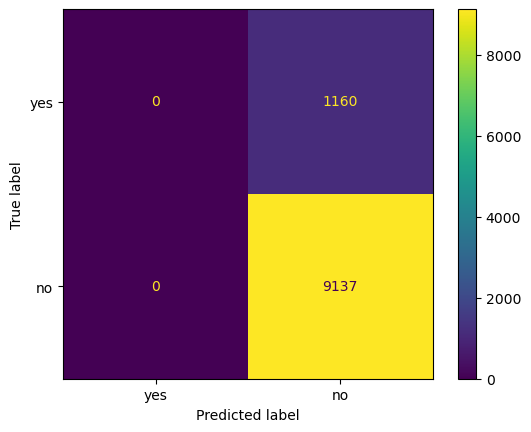

In [145]:
dummy_confusion_mat = confusion_matrix(y_test, y_pred_dummy, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=dummy_confusion_mat, display_labels=['yes', 'no' ])
disp.plot()
plt.show()

In [146]:
print(f"Dummy Classifier Accuracy: {accuracy_dummy:.2%}, Precision: {precision_dummy:.2%}")

Dummy Classifier Accuracy: 88.73%, Precision: 0.00%


Dummy classifier is showing accuracy as 88.7. In our classification models we will aiming to beat this performance.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [150]:
start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_time = time.time() - start_time

In [151]:
print("Logistic Regression Training Time:", log_reg_time)
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))

Logistic Regression Training Time: 0.08101201057434082
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      9137
           1       0.69      0.41      0.52      1160

    accuracy                           0.91     10297
   macro avg       0.81      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



### Problem 9: Score the Model

What is the accuracy of your model?

In [153]:
print("\n Logistic Regression Test set accuracy:", accuracy_score(y_test, log_reg_pred))


 Logistic Regression Test set accuracy: 0.9131785957074876


We can see that this simple Logistic regression out performed the Dummy classification model.

In [158]:
train_score_log = log_reg.score(X_train_scaled, y_train)
test_score_log = log_reg.score(X_test_scaled, y_test)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### Decision Tree

In [157]:
start_time = time.time()
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_time = time.time() - start_time
print("Decision Tree Training Time:", tree_time)
print("Decision Tree Classification Report:\n", classification_report(y_test, tree_pred))

Decision Tree Training Time: 0.13599801063537598
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      9137
           1       0.50      0.51      0.50      1160

    accuracy                           0.89     10297
   macro avg       0.72      0.72      0.72     10297
weighted avg       0.89      0.89      0.89     10297



In [160]:
train_score_tree = tree.score(X_train, y_train)
test_score_tree = tree.score(X_test, y_test)

#### K- Nearest Neighbour

In [161]:
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_time = time.time() - start_time
print("KNN Training Time:", knn_time)
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))

KNN Training Time: 0.8294680118560791
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9137
           1       0.61      0.39      0.48      1160

    accuracy                           0.90     10297
   macro avg       0.77      0.68      0.71     10297
weighted avg       0.89      0.90      0.89     10297



In [168]:
train_score_knn = knn.score(X_train_scaled, y_train)
test_score_knn = knn.score(X_test_scaled, y_test)

#### SVC

In [167]:
start_time = time.time()
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_time = time.time() - start_time

print("SVM Training Time:", svm_time)
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

SVM Training Time: 16.329004049301147
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      9137
           1       0.71      0.38      0.49      1160

    accuracy                           0.91     10297
   macro avg       0.82      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



In [179]:
train_score_svm = svm.score(X_train_scaled, y_train)
test_score_svm= svm.score(X_test_scaled, y_test)

##### Accuracy score and the time taken to train the model for each four models are displayed.

In [180]:
results = {
    'Model': ['Logistic Regression','Decision Tree','KNN' ,'SVC'],
    'Train Time': [log_reg_time, tree_time, knn_time,svm_time],
    'Train Accuracy': [train_score_log, train_score_tree, train_score_knn, train_score_svm],
    'Test Accuracy ': [test_score_log, test_score_tree, test_score_knn, test_score_svm]}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy 
0  Logistic Regression    0.081012        0.909229        0.913179
1        Decision Tree    0.135998        0.919556        0.912693
2                  KNN    0.747123        0.926840        0.903370
3                  SVC   16.329004        0.919556        0.912693


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Calculating permutation importance on Logistic Regression Model

In [185]:
perm_importance_log = permutation_importance(log_reg, X_test_scaled, y_test, n_repeats=10, random_state=42)

In [186]:
sorted_idx_log = perm_importance_log.importances_mean.argsort()

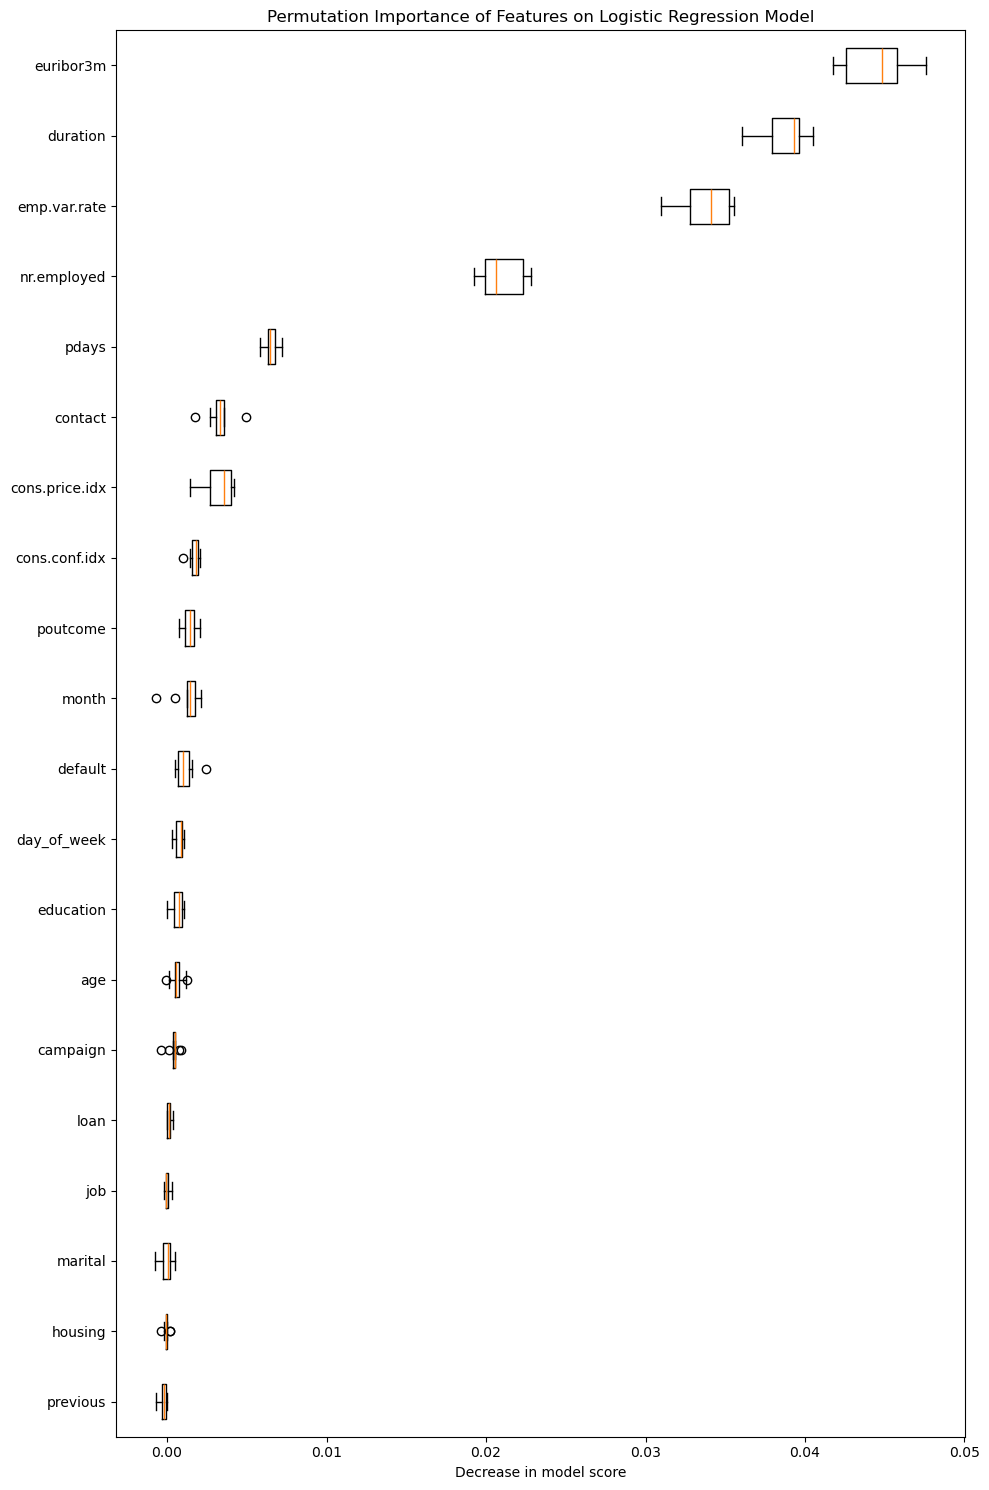

In [238]:
plt.figure(figsize=(10, 15))
plt.boxplot(perm_importance_log.importances[sorted_idx_log].T,
            vert=False, labels=np.array(X.columns)[sorted_idx_log])
plt.title("Permutation Importance of Features on Logistic Regression Model")
plt.xlabel("Decrease in model score")
plt.tight_layout()
plt.show()

In [188]:
for i in sorted_idx_log[::-1]:
    if perm_importance_log.importances_mean[i] > 0:
        print(f"{X.columns[i]:<8}: "
              f"{perm_importance_log.importances_mean[i]:.3f} "
              f"+/- {perm_importance_log.importances_std[i]:.3f}")

euribor3m: 0.044 +/- 0.002
duration: 0.039 +/- 0.001
emp.var.rate: 0.034 +/- 0.002
nr.employed: 0.021 +/- 0.001
pdays   : 0.007 +/- 0.000
contact : 0.003 +/- 0.001
cons.price.idx: 0.003 +/- 0.001
cons.conf.idx: 0.002 +/- 0.000
poutcome: 0.001 +/- 0.000
month   : 0.001 +/- 0.001
default : 0.001 +/- 0.001
day_of_week: 0.001 +/- 0.000
education: 0.001 +/- 0.000
age     : 0.001 +/- 0.000
campaign: 0.000 +/- 0.000
loan    : 0.000 +/- 0.000


In [ ]:
##### Calculating permutation importance on Decision Tree Model

In [191]:
perm_importance_tree = permutation_importance(tree, X_test, y_test, n_repeats=10, random_state=42)

In [192]:
sorted_idx_tree = perm_importance_tree.importances_mean.argsort()

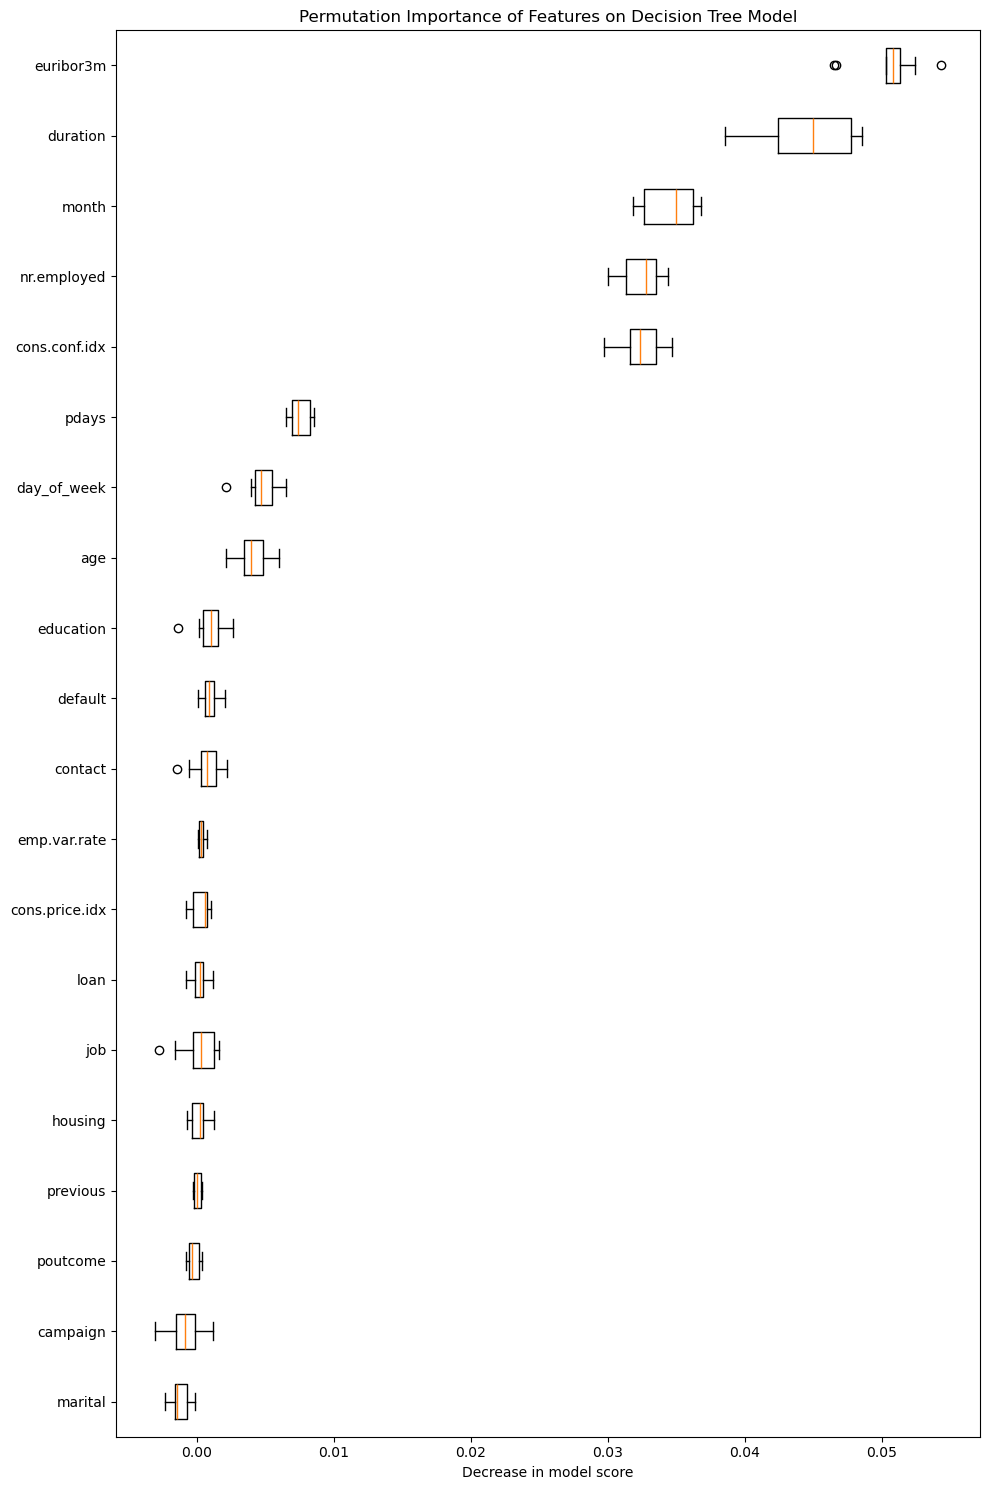

In [239]:
plt.figure(figsize=(10, 15))
plt.boxplot(perm_importance_tree.importances[sorted_idx_tree].T,
            vert=False, labels=np.array(X.columns)[sorted_idx_tree])
plt.title("Permutation Importance of Features on Decision Tree Model")
plt.xlabel("Decrease in model score")
plt.tight_layout()
plt.show()

In [194]:
for i in sorted_idx_tree[::-1]:
    if perm_importance_tree.importances_mean[i] > 0:
        print(f"{X.columns[i]:<8}: "
              f"{perm_importance_tree.importances_mean[i]:.3f} "
              f"+/- {perm_importance_tree.importances_std[i]:.3f}")

euribor3m: 0.050 +/- 0.002
duration: 0.045 +/- 0.003
month   : 0.035 +/- 0.002
nr.employed: 0.032 +/- 0.001
cons.conf.idx: 0.032 +/- 0.002
pdays   : 0.008 +/- 0.001
day_of_week: 0.005 +/- 0.001
age     : 0.004 +/- 0.001
education: 0.001 +/- 0.001
default : 0.001 +/- 0.001
contact : 0.001 +/- 0.001
emp.var.rate: 0.000 +/- 0.000
cons.price.idx: 0.000 +/- 0.001
loan    : 0.000 +/- 0.001
job     : 0.000 +/- 0.001
housing : 0.000 +/- 0.001
previous: 0.000 +/- 0.000


In [195]:
perm_importance_knn = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx_knn = perm_importance_knn.importances_mean.argsort()

In [196]:
for i in sorted_idx_knn[::-1]:
    if perm_importance_knn.importances_mean[i] > 0:
        print(f"{X.columns[i]:<8}: "
              f"{perm_importance_knn.importances_mean[i]:.3f} "
              f"+/- {perm_importance_knn.importances_std[i]:.3f}")

duration: 0.026 +/- 0.002
cons.conf.idx: 0.008 +/- 0.001
pdays   : 0.006 +/- 0.001
nr.employed: 0.003 +/- 0.001
cons.price.idx: 0.003 +/- 0.001
month   : 0.003 +/- 0.001
euribor3m: 0.002 +/- 0.000
contact : 0.001 +/- 0.001
day_of_week: 0.001 +/- 0.001
previous: 0.001 +/- 0.000
poutcome: 0.000 +/- 0.001
loan    : 0.000 +/- 0.001
job     : 0.000 +/- 0.001
education: 0.000 +/- 0.002
housing : 0.000 +/- 0.001


In [ ]:
Housing and marital status tend to show least importance. 

#### Tuning the the model using GridSearchCV

##### GridSearch on Logistic Regression Model

In [ ]:
Choosing a range np.logspace(-4, 4, 20) so that it will give a good spectrum between strong Regularization and weak Reularization.Liblinear and saga supports L1 and L2 regularization.

In [197]:
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [200]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [201]:
grid_search_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [202]:
start_time_log = time.time()
grid_search_log.fit(X_train_scaled, y_train)
end_time_log = time.time()

In [204]:
best_model_log = grid_search_log.best_estimator_
y_pred_log = best_model_log.predict(X_test_scaled)

In [205]:
best_train_score_log = best_model_log.score(X_train_scaled, y_train)
best_test_score_log = best_model_log.score(X_test_scaled, y_test)

In [206]:
avg_fit_time_log = (end_time_log - start_time_log) / 5 

In [208]:
print("\nTest set accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


Test set accuracy: 0.9134699427017577

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9137
           1       0.70      0.41      0.52      1160

    accuracy                           0.91     10297
   macro avg       0.81      0.69      0.74     10297
weighted avg       0.90      0.91      0.90     10297



##### GridSearch on KNN Model

In [ ]:
Our data set contains continuous  and categorical features. So using different distance metrics 'euclidean', 'manhattan', 'minkowski' may perform depending on the feature.

In [209]:
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Only relevant for Minkowski metric
}

In [210]:
knn = KNeighborsClassifier()

In [211]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
start_time_knn = time.time()
grid_search_knn.fit(X_train_scaled, y_train)
end_time_knn = time.time()

In [223]:
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test_scaled)

In [214]:
avg_fit_time_knn = (end_time_knn - start_time_knn) / 5  

In [215]:
best_train_score_knn = best_model_knn.score(X_train_scaled, y_train)
best_test_score_knn = best_model_knn.score(X_test_scaled, y_test)

In [233]:
print("\n KNN GridSearchCV Classification Report:")
print(classification_report(y_test, y_pred_knn))


 KNN GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9137
           1       0.68      0.35      0.46      1160

    accuracy                           0.91     10297
   macro avg       0.80      0.66      0.70     10297
weighted avg       0.89      0.91      0.89     10297



##### GridSearch on SVC Model

Linear kernal will be a good use if the relationship between feature and target is linear. rbs kernal will be good for non-linear relation ship between attributes.

In [216]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
}

In [217]:
svc = SVC(random_state=42)

In [218]:
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
start_time_svc = time.time()
grid_search_svc.fit(X_train_scaled, y_train)
end_time_svc = time.time()

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [219]:
best_model_svc = grid_search_svc.best_estimator_
y_pred_svc = best_model_svc.predict(X_test_scaled)

In [220]:
avg_fit_time_svc = (end_time_svc - start_time_svc) / 5  # Divide by 5 because of 5-fold CV

In [221]:
best_train_score_svc = best_model_svc.score(X_train_scaled, y_train)
best_test_score_svc = best_model_svc.score(X_test_scaled, y_test)

In [234]:
print("\n SVC GridSearchCV Classification Report:")
print(classification_report(y_test, y_pred_svc))


 SVC GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9137
           1       0.71      0.38      0.49      1160

    accuracy                           0.91     10297
   macro avg       0.82      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



In [ ]:
##### GridSearch on Decision Tree Model

Below parameter grid allow GridsearchCV to try tree with different levels of complexity.

In [224]:
param_grid_tree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [225]:
tree = DecisionTreeClassifier()

In [227]:
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
start_time_tree = time.time()
grid_search_tree.fit(X_train, y_train)
end_time_tree = time.time()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [228]:
best_model_tree = grid_search_tree.best_estimator_
y_pred_tree = best_model_tree.predict(X_test)

In [229]:
avg_fit_time_tree = (end_time_tree - start_time_tree) / 5 

In [231]:
best_train_score_tree = best_model_tree.score(X_train, y_train)
best_test_score_tree = best_model_tree.score(X_test, y_test)

In [235]:
print("\n Decision Tree GridSearchCV Classification Report:")
print(classification_report(y_test, y_pred_tree))


 Decision Tree GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9137
           1       0.67      0.52      0.59      1160

    accuracy                           0.92     10297
   macro avg       0.81      0.74      0.77     10297
weighted avg       0.91      0.92      0.91     10297



#### Evaluation of Models

In [ ]:
Comparision of Train time , Train and Test accuracy will give a basic understanding of the model performance. Decision Tree model showed a best accuracy and the train time was least for this. 

In [232]:
results = {
    'Model': ['Logistic Regression','Decision Tree','KNN' ,'SVC'],
    'Train Time': [avg_fit_time_log, avg_fit_time_tree, avg_fit_time_knn,avg_fit_time_svc],
    'Train Accuracy': [best_train_score_log, best_train_score_tree, best_train_score_knn, best_train_score_svc],
    'Test Accuracy ': [best_test_score_log, best_test_score_tree, best_test_score_knn, best_test_score_svc]}

results_df = pd.DataFrame(results)
print(results_df)

                 Model   Train Time  Train Accuracy  Test Accuracy 
0  Logistic Regression     9.513851        0.909650        0.913470
1        Decision Tree     2.156552        0.916448        0.917452
2                  KNN   150.519773        1.000000        0.907740
3                  SVC  8786.679336        0.919556        0.912693


In [ ]:
Models can be fine tuned based on the buisness nedd using the Precision , Recal and FI score. Precision can be used to reduce false negatives. In this Bank Marketing data modeling precision can be used fine tune the model so that false prediction of customer will accept a service can be minimized.
SVC model showed the best precision among all models with 0.93 for rejection(0) and 0.71 for acceptance (1)

In [ ]:
Recal scoring can be used if buisiness wants reach maximize the chance to reach more customers and maximize service acceptance. Decision tree showed the best Recal score of 0.97 on rejection and a high of 0.52 on acceptance  

In [ ]:
F1 score give a balance between Precision and Recall score. Decision tree model has the best FI score among all the models.

##### Questions